In [1]:
import os
import pandas as pd


base_path = "waste_dataset/images"

rows = []

text_map = {
    "dry": "dry recyclable waste",
    "wet": "organic food waste",
    "hazardous": "hazardous electronic waste"
}

for label in ["dry", "wet", "hazardous"]:
    folder = os.path.join(base_path, label)
    for img in os.listdir(folder):
        if img.lower().endswith((".jpg", ".jpeg", ".png", ".webp")):
            rows.append({
                "image_path": f"images/{label}/{img}",
                "text": text_map[label],
                "label": label
            })

df = pd.DataFrame(rows)
df.to_csv("waste_dataset/data.csv", index=False)

print("✅ Clean data.csv created")
print(df['label'].value_counts())
df.head()


✅ Clean data.csv created
label
dry          3310
wet          1540
hazardous     818
Name: count, dtype: int64


,image_path,text,label
0,images/dry/R_10680.jpg,dry recyclable waste,dry
1,images/dry/cardboard166 2.jpg,dry recyclable waste,dry
2,images/dry/metal296.jpg,dry recyclable waste,dry
3,images/dry/R_10858.jpg,dry recyclable waste,dry
4,images/dry/plastic391.jpg,dry recyclable waste,dry


In [2]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Image preprocessing
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(
    root="waste_dataset/images",
    transform=transform
)

print("Class to index mapping:", dataset.class_to_idx)
print("Total images:", len(dataset))


Class to index mapping: {'dry': 0, 'hazardous': 1, 'wet': 2}
Total images: 5668


In [3]:
from torch.utils.data import random_split

train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print("Train size:", len(train_dataset))
print("Test size:", len(test_dataset))


Train size: 3967
Test size: 1701


In [4]:
import torch.nn as nn
import torch.nn.functional as F

class WasteCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 32 * 32, 64)
        self.fc2 = nn.Linear(64, 3)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

model = WasteCNN()
print(model)


WasteCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=32768, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=3, bias=True)
)


In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 5

for epoch in range(epochs):
    model.train()
    running_loss = 0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss:.4f}")



Epoch 1/5, Loss: 68.8265
Epoch 2/5, Loss: 46.6581
Epoch 3/5, Loss: 38.3074
Epoch 4/5, Loss: 33.3176
Epoch 5/5, Loss: 25.1610


In [6]:
from torch.utils.data import random_split

train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print("Train size:", len(train_dataset))
print("Test size:", len(test_dataset))


Train size: 3967
Test size: 1701


In [7]:
import torch.nn as nn
import torch.nn.functional as F

class WasteCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 32 * 32, 64)
        self.fc2 = nn.Linear(64, 3)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

model = WasteCNN()
print(model)


WasteCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=32768, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=3, bias=True)
)


In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 5

for epoch in range(epochs):
    model.train()
    running_loss = 0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss:.4f}")


Epoch 1/5, Loss: 72.9507
Epoch 2/5, Loss: 44.9982
Epoch 3/5, Loss: 38.7041
Epoch 4/5, Loss: 34.1459
Epoch 5/5, Loss: 27.7906


In [9]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

accuracy = correct / total
print("Image-only CNN Accuracy:", accuracy)


Image-only CNN Accuracy: 0.873015873015873


In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_true = []
y_pred = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(preds.numpy())

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:")
print(classification_report(
    y_true,
    y_pred,
    target_names=dataset.classes
))


Confusion Matrix:
 [[874  10  95]
 [ 50 187   4]
 [ 53   4 424]]

Classification Report:
              precision    recall  f1-score   support

         dry       0.89      0.89      0.89       979
   hazardous       0.93      0.78      0.85       241
         wet       0.81      0.88      0.84       481

    accuracy                           0.87      1701
   macro avg       0.88      0.85      0.86      1701
weighted avg       0.88      0.87      0.87      1701



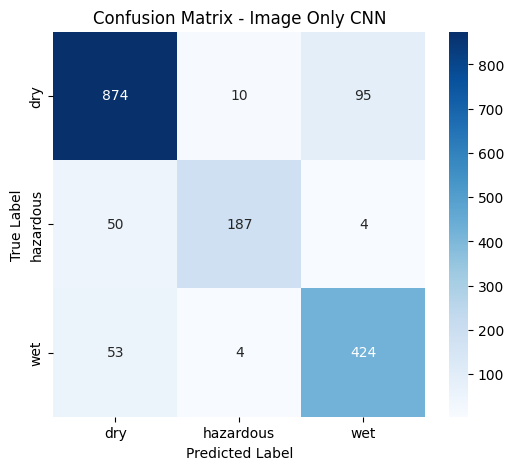

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix already computed earlier
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=dataset.classes,
    yticklabels=dataset.classes
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Image Only CNN")
plt.show()


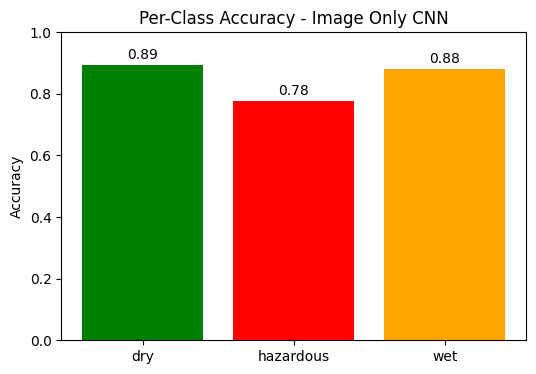

In [12]:
import numpy as np

class_names = dataset.classes
class_correct = np.zeros(len(class_names))
class_total = np.zeros(len(class_names))

for t, p in zip(y_true, y_pred):
    class_total[t] += 1
    if t == p:
        class_correct[t] += 1

class_accuracy = class_correct / class_total

plt.figure(figsize=(6,4))
plt.bar(class_names, class_accuracy, color=["green", "red", "orange"])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Per-Class Accuracy - Image Only CNN")

for i, acc in enumerate(class_accuracy):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha="center")

plt.show()


In [13]:
import pandas as pd
import os
import random

base_path = "waste_dataset/images"

text_templates = {
    "dry": [
        "plastic bottle waste",
        "paper or cardboard recyclable waste",
        "metal or glass recyclable item",
        "dry recyclable household waste"
    ],
    "wet": [
        "food waste from kitchen",
        "vegetable peels and organic waste",
        "leftover food biodegradable waste",
        "organic wet waste"
    ],
    "hazardous": [
        "used battery electronic waste",
        "discarded electronic item",
        "hazardous waste item",
        "e-waste with toxic components"
    ]
}

rows = []

for label in ["dry", "wet", "hazardous"]:
    folder = os.path.join(base_path, label)
    for img in os.listdir(folder):
        if img.lower().endswith((".jpg", ".jpeg", ".png", ".webp")):
            rows.append({
                "image_path": f"images/{label}/{img}",
                "text": random.choice(text_templates[label]),
                "label": label
            })

df = pd.DataFrame(rows)
df.to_csv("waste_dataset/data.csv", index=False)

print("✅ data.csv updated with meaningful text")
df.head()


✅ data.csv updated with meaningful text


,image_path,text,label
0,images/dry/R_10680.jpg,metal or glass recyclable item,dry
1,images/dry/cardboard166 2.jpg,dry recyclable household waste,dry
2,images/dry/metal296.jpg,metal or glass recyclable item,dry
3,images/dry/R_10858.jpg,plastic bottle waste,dry
4,images/dry/plastic391.jpg,paper or cardboard recyclable waste,dry


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
import torch

tfidf = TfidfVectorizer(
    max_features=200,
    ngram_range=(1, 2),
    stop_words="english"
)

X_text = tfidf.fit_transform(df["text"])
X_text_tensor = torch.tensor(X_text.toarray(), dtype=torch.float32)

print("Text feature shape:", X_text_tensor.shape)


Text feature shape: torch.Size([5668, 56])


In [15]:
 # Freeze CNN weights
for param in model.parameters():
    param.requires_grad = False

model.eval()

image_features = []

with torch.no_grad():
    for images, _ in DataLoader(dataset, batch_size=32):
        feats = model.fc1(
            model.pool(
                torch.relu(model.conv2(
                    model.pool(torch.relu(model.conv1(images)))
                ))
            ).view(images.size(0), -1)
        )
        image_features.append(feats)

image_features = torch.cat(image_features)
print("Image feature shape:", image_features.shape)


Image feature shape: torch.Size([5668, 64])


In [16]:
import torch.nn as nn
import torch.nn.functional as F

class FusionModel(nn.Module):
    def __init__(self, text_dim):
        super().__init__()
        self.fc1 = nn.Linear(64 + text_dim, 64)
        self.fc2 = nn.Linear(64, 3)

    def forward(self, image_feat, text_feat):
        x = torch.cat((image_feat, text_feat), dim=1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

fusion_model = FusionModel(text_dim=X_text_tensor.shape[1])
print(fusion_model)


FusionModel(
  (fc1): Linear(in_features=120, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=3, bias=True)
)


In [17]:
# Get labels in same order as dataset
labels = [label for _, label in dataset.samples]
labels_tensor = torch.tensor(labels, dtype=torch.long)

print("Labels shape:", labels_tensor.shape)


Labels shape: torch.Size([5668])


In [18]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(fusion_model.parameters(), lr=0.001)

epochs = 5

for epoch in range(epochs):
    fusion_model.train()
    optimizer.zero_grad()

    outputs = fusion_model(image_features, X_text_tensor)
    loss = criterion(outputs, labels_tensor)

    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")


Epoch 1/5, Loss: 1.0848
Epoch 2/5, Loss: 0.9113
Epoch 3/5, Loss: 0.7876
Epoch 4/5, Loss: 0.7029
Epoch 5/5, Loss: 0.6442


In [19]:
fusion_model.eval()

with torch.no_grad():
    outputs = fusion_model(image_features, X_text_tensor)
    _, preds = torch.max(outputs, 1)

accuracy = (preds == labels_tensor).float().mean()
print("Fusion Model Accuracy:", accuracy.item())


Fusion Model Accuracy: 0.7535285949707031


In [20]:
import os
import torch

# Create model directory if it doesn't exist
os.makedirs("model", exist_ok=True)

# Save trained CNN
torch.save(model.state_dict(), "model/waste_cnn.pth")

print("✅ Model saved as model/waste_cnn.pth")


✅ Model saved as model/waste_cnn.pth


In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define the same CNN architecture
class WasteCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 32 * 32, 64)
        self.fc2 = nn.Linear(64, 3)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

# Load model
model = WasteCNN()
model.load_state_dict(torch.load("model/waste_cnn.pth", map_location="cpu"))
model.eval()

print("✅ Model loaded successfully")


✅ Model loaded successfully


In [34]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

class_names = ["dry", "hazardous", "wet"]


In [35]:
from tkinter import Tk, filedialog

# Create root window
root = Tk()
root.withdraw()

# Ask for file
file_path = filedialog.askopenfilename(
    title="Select an image",
    filetypes=[("Image files", "*.jpg *.jpeg *.png *.webp")]
)

print("FILE PATH =", repr(file_path))


FILE PATH = '/Users/omsrivastava/Desktop/waste_ml_project/waste_dataset/trash/trash3.jpg'


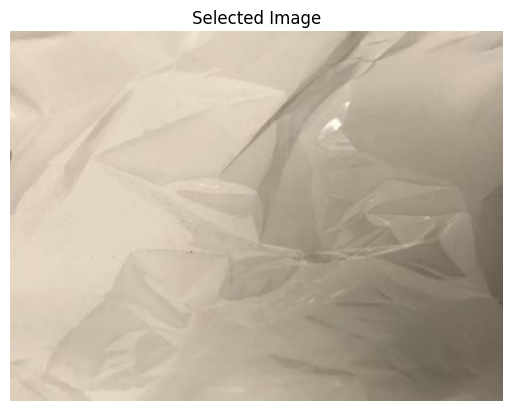

✅ Image loaded successfully


In [36]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Safety check
if not file_path or not os.path.exists(file_path):
    raise ValueError("❌ Invalid file path. Please select an image again.")

# Load image safely
img = Image.open(file_path)
img = img.convert("RGB")

plt.imshow(img)
plt.axis("off")
plt.title("Selected Image")
plt.show()

print("✅ Image loaded successfully")


In [37]:
import torch
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

class_names = ["dry", "hazardous", "wet"]

img_tensor = transform(img).unsqueeze(0)

with torch.no_grad():
    outputs = model(img_tensor)
    probs = torch.softmax(outputs, dim=1)
    conf, pred = torch.max(probs, 1)

print("Predicted Class:", class_names[pred.item()])
print(f"Confidence: {conf.item()*100:.2f}%")


Predicted Class: dry
Confidence: 89.72%
